<a href="https://colab.research.google.com/github/AndiFt/UAS_DATAMINING/blob/main/solana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import **Library**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import joblib
import json
import csv
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
warnings.filterwarnings('ignore')

### PreProcessing Data


Informasi Missing Values:
Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

 Total Data : 
(1073, 7)

 kolom yang digunakan :
['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']

 Data yang sudah dipreprocessing telah disimpan dalam file clean1.csv.

 Grafik Harga Dari Data baru  :



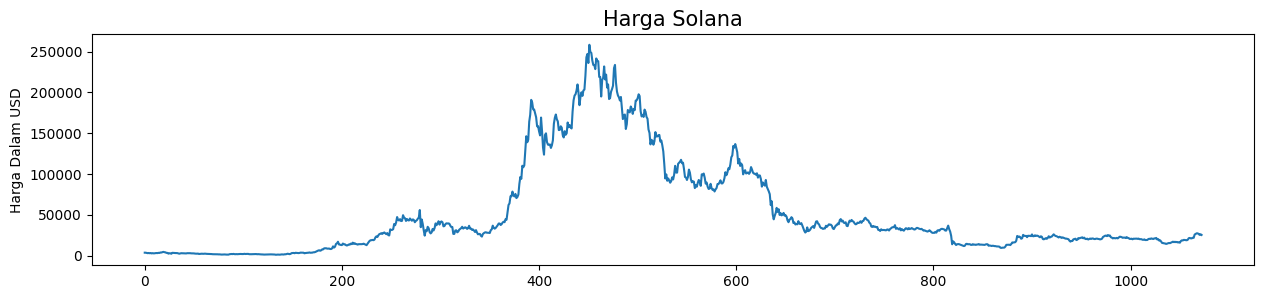


 Data baru  :



,Terakhir,Pembukaan,Tertinggi,Terendah
count,1073.000000,1073.000000,1073.000000,1073.000000
mean,51157.399814,51141.881640,53601.631873,48652.480895
std,57698.257897,57722.075176,60256.318758,54921.966991
min,1198.000000,1198.000000,1389.000000,1030.000000
25%,14300.000000,14300.000000,14990.000000,13700.000000
50%,29673.000000,29676.000000,31440.000000,27898.000000
75%,58670.000000,58800.000000,68290.000000,52396.000000
max,258350.000000,258440.000000,259800.000000,245670.000000


In [14]:
def preprocess_and_save(csv_file_path, required_columns, output_csv_file):
    dfa = pd.read_csv(csv_file_path)
    acleaned_df = dfa[required_columns]
    acleaned_df_reversed = acleaned_df[::-1]
    acleaned_df_reversed.to_csv('clean.csv', index=False, decimal='.')

    df = pd.read_csv(csv_file_path, thousands=',', decimal='.')
    cleaned_df = df[required_columns]  # Select only the desired columns
    cleaned_df_reversed = cleaned_df[::-1]  # Reverse the order of rows
    cleaned_df_reversed.to_csv(output_csv_file, index=False, decimal='.')

csv_file_path = '/content/Data Historis SOL_USD Binance.csv'
required_columns = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']
output_csv_file = 'clean1.csv'

preprocess_and_save(csv_file_path, required_columns, output_csv_file)

df = pd.read_csv(csv_file_path)
df.head()
print("\nInformasi Missing Values:")
print(df.isnull().sum())
print("\n Total Data : ")
print(df.shape)
print("\n kolom yang digunakan :")
print(required_columns)
print(f"\n Data yang sudah dipreprocessing telah disimpan dalam file {output_csv_file}.")

newdata = 'clean1.csv'
dta = pd.read_csv(newdata)


print("\n Grafik Harga Dari Data baru  :\n")


plt.figure(figsize=(15,3))
plt.plot(dta['Terakhir'])
plt.title('Harga Solana', fontsize=15)
plt.ylabel('Harga Dalam USD')
plt.show()



print("\n Data baru  :\n")
dta.describe()

### Visualisasi Training Set Result


In [15]:
data = pd.read_csv('clean1.csv')
target_column = 'Terakhir'
feature_columns = ['Pembukaan','Tertinggi','Terendah']
y = data[target_column]
X = data[feature_columns]
print(X)
print(y)

      Pembukaan  Tertinggi  Terendah
0          3299       3929      3080
1          3756       4139      3500
2          3730       3768      3321
3          3410       3740      3150
4          3173       3491      3120
...         ...        ...       ...
1068      27500      28550     26780
1069      27430      28470     25790
1070      26810      27060     24800
1071      25500      26980     25380
1072      26310      27360     25330

[1073 rows x 3 columns]
0        3756
1        3730
2        3410
3        3173
4        3389
        ...  
1068    27420
1069    26800
1070    25550
1071    26320
1072    25490
Name: Terakhir, Length: 1073, dtype: int64


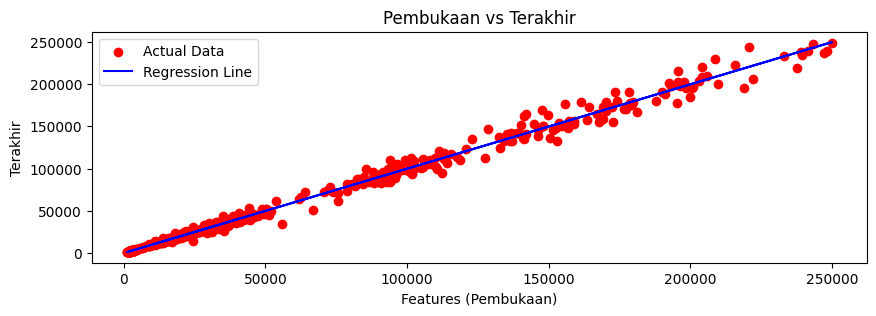

In [16]:
data = pd.read_csv('clean1.csv')
target_column = 'Terakhir'
feature_columns = ['Pembukaan']
y = data[target_column]
X = data[feature_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.figure(figsize=(10, 3))
plt.scatter(X_train, y_train, color='red', label='Actual Data')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression Line')
plt.title('Pembukaan vs Terakhir')
plt.xlabel('Features (Pembukaan)')
plt.ylabel('Terakhir')
plt.legend()
plt.show()

In [17]:
def train_and_save_model(csv_file_path, target_column, feature_columns, model_file):
    df = pd.read_csv(csv_file_path)
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '.').astype(float)
    data = df[[target_column] + feature_columns]
    X = data[feature_columns]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    model_dict = {
        'coefficients': model.coef_.tolist(),
        'intercept': model.intercept_
    }
    with open(model_file, 'w') as json_file:
        json.dump(model_dict, json_file)
    return model, y_test, y_pred, mse, r_squared

csv_file_path = 'clean.csv'
target_column = 'Terakhir'
feature_columns = ['Pembukaan', 'Tertinggi', 'Terendah']
model_file = 'linear_regression_model.json'
model, y_test, y_pred, mse, r_squared = train_and_save_model(csv_file_path, target_column, feature_columns, model_file)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print(f"R-squared: {r_squared}")

Mean Absolute Error (MAE): 1.2151862939248854
Mean Squared Error (MSE): 4.658312460385232
R-squared: 0.9986081046640696


In [18]:
def str_to_float(s):
    return float(s.replace(",", ""))
def format_with_commas_and_decimal(num):
    formatted_num = "{:,.3f}".format(num)
    return formatted_num.rstrip("0").rstrip(".") if "." in formatted_num else formatted_num
def predict_price(data):
    return data[0] + 5  # Just an example, predicting the "Terakhir" column + 5
data_list = []
with open('clean.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header row
    for row in reader:
        data_list.append([str_to_float(row[0]), str_to_float(row[1]), str_to_float(row[2]), str_to_float(row[3])])
predicted_prices = [predict_price(data) for data in data_list]
with open('predicted_prices.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Harga Asli', 'Hasil Prediksi'])
    for data, predicted_price in zip(data_list, predicted_prices):
        formatted_predicted_price = format_with_commas_and_decimal(predicted_price)
        writer.writerow([format_with_commas_and_decimal(data[0]),
                         formatted_predicted_price])
hasil1 = pd.read_csv('predicted_prices.csv')
hasil1.head(11)

,Harga Asli,Hasil Prediksi
0,"3,756","3,761"
1,"3,730","3,735"
2,"3,410","3,415"
3,"3,173","3,178"
4,"3,389","3,394"
5,"3,110","3,115"
6,"3,341","3,346"
7,"2,887","2,892"
8,"3,204","3,209"
9,"2,932","2,937"
